# CAPSTONE PROJECT
#  Unsupervised Machine Learning

# Customer Segmentation
## Problem: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
## Task: Based on this data you are required to build features and model on these characteristics of users to categorize users based on their transactions . Your model will be evaluated on these criteria: -
- a. Feature Engineering (Variable Imputation)
- b. Model Selection Criteria (Basis of choosing the final Technique)
- c. Measurement Criteria (Comparison of Various Models)
- d. Scope for improvement
## Expected Outputs:-
- 1. The Final code (Python or R) along with proper comments
- 2. A summary file (PDF format) stating :
- a. Problem Statement
- b. Approach Taken
- c. Interpretation of Results
- d. Minimal but effective Storyboarding - Consider the final audience of this will be the Business team. You need to bring the actionable insights in this section.

# Customer Segmentation using Clustering
# Association Rule Mining 

## Importing the Dependencies (Libraries)

In [1]:
# Importing Libraries
import seaborn as sns
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

## Data Collection & Analysis

In [2]:
df_raw=pd.read_csv("OnlineRetail.csv",encoding= 'unicode_escape')
print(df_raw.shape)

(541909, 8)


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df_raw.shape

(541909, 8)

In [6]:
df_raw.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# count of duplicated rows in the data
df_raw.duplicated().sum()

5268

In [8]:
df_raw = df_raw[~df_raw.duplicated()]
df_raw.shape

(536641, 8)

In [9]:
df_raw.duplicated().sum()

0

In [10]:
# checking Null Values
df_raw.isnull().sum()/df_raw.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002709
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.251634
Country        0.000000
dtype: float64

In [11]:
(df_raw.isnull().sum()/df_raw.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

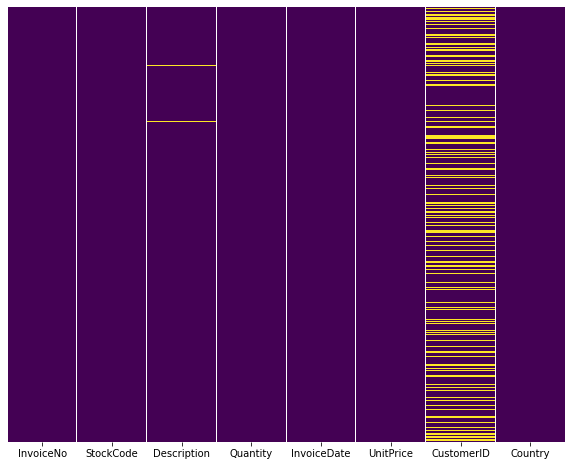

In [12]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df_raw.isnull(), yticklabels = False,cbar = False, cmap='viridis')
plt.show()

In [13]:
df_raw.isnull().sum().sum()

136491

In [14]:
df_raw = df_raw[~df_raw["Description"].isnull()]

In [15]:
df_raw.isnull().sum().sum()

133583

In [16]:
df_raw.describe()

,Quantity,UnitPrice,CustomerID
count,535187.000000,535187.000000,401604.000000
mean,9.671593,4.645242,15281.160818
std,219.059056,97.364810,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df_raw = df_raw[~df_raw.Description.str.contains('wrongly')]   

In [18]:
df_raw.shape

(535174, 8)

In [19]:
df_raw.Description = df_raw.Description.str.strip()

In [20]:
df_raw.InvoiceNo.unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [21]:
df_raw.InvoiceNo.nunique()

24433

In [22]:
# Checking canceled orders denoted by 'C'   
df_raw[df_raw.InvoiceNo.str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [23]:
df_raw = df_raw[~df_raw.InvoiceNo.str.contains('C')]

In [24]:
df_raw.shape

(525923, 8)

In [25]:
df_raw.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133191
Country             0
dtype: int64

In [26]:
df_raw.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [89]:
df_raw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# EDA & Data Visualization

In [28]:
df_raw1 = df_raw.copy()

In [29]:
df_raw1['Amount']=df_raw['Quantity']*df_raw['UnitPrice']

In [30]:
df_raw1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [31]:
df_raw1.Country.nunique()

38

In [32]:
df_raw1.Country.value_counts()

United Kingdom          481012
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

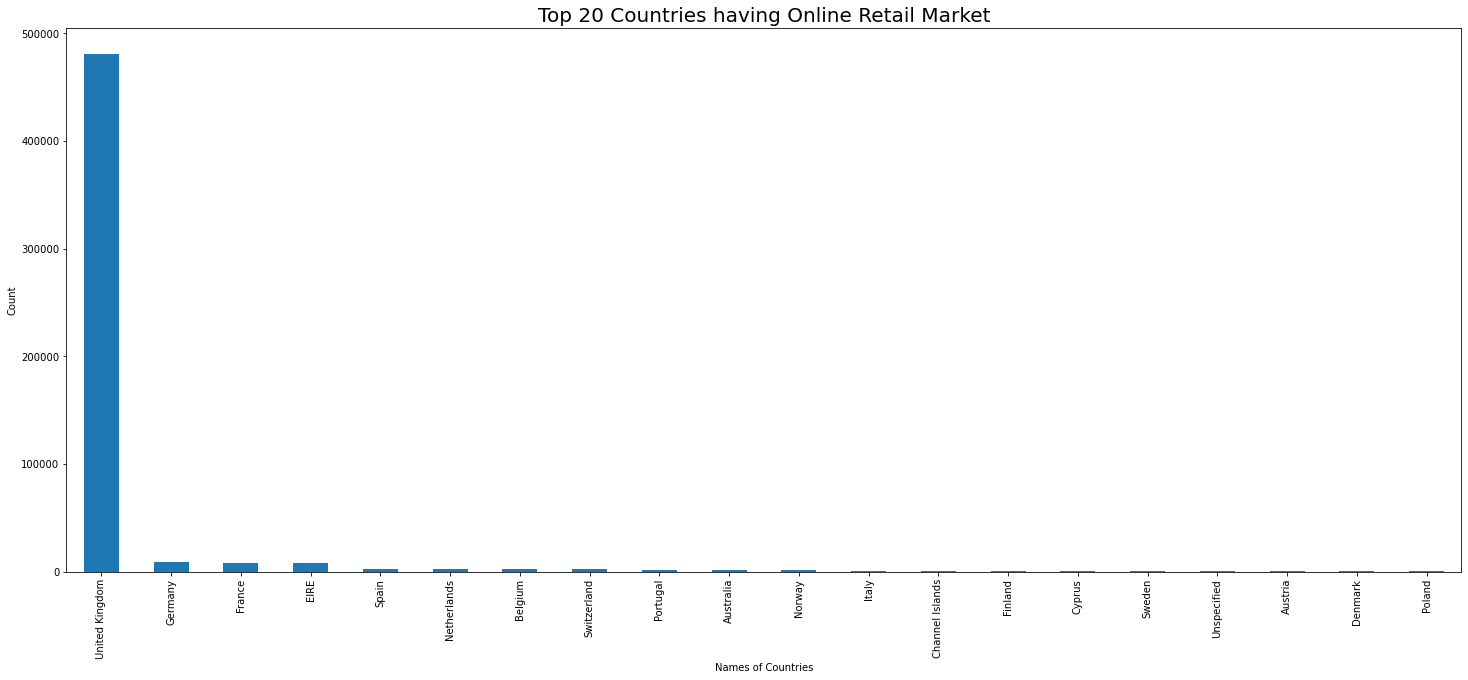

In [33]:
# checking the different values for country in the df_rawset

df_raw1['Country'].value_counts().head(20).plot.bar(figsize = (25, 10))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

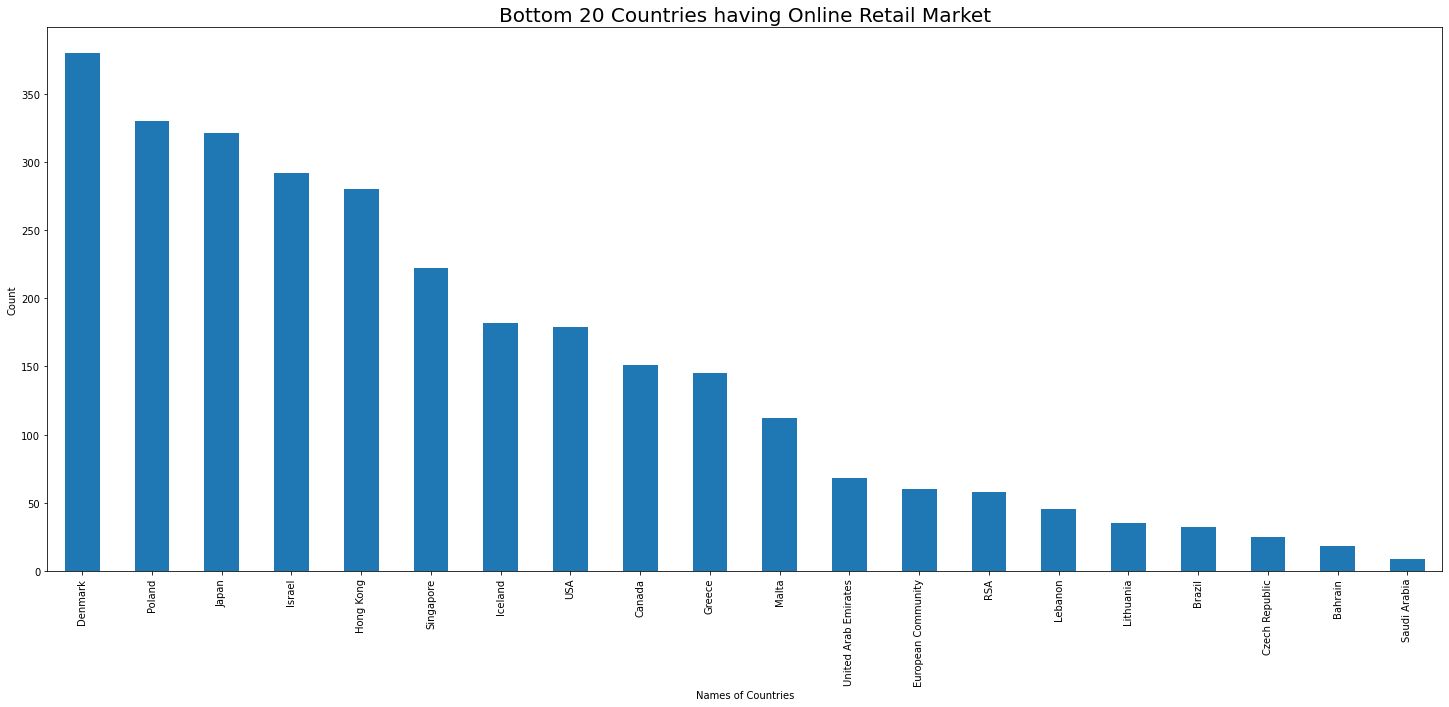

In [34]:
# checking the different values for country in the df_rawset

df_raw1['Country'].value_counts().tail(20).plot.bar(figsize = (25, 10))
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [35]:
# checking how many quantity of products have been sold online from each country

df_raw1['Quantity'].groupby(df_raw1['Country']).agg('sum')

Country
Australia                 84199
Austria                    4881
Bahrain                     314
Belgium                   23237
Brazil                      356
Canada                     2763
Channel Islands            9485
Cyprus                     6340
Czech Republic              671
Denmark                    8235
EIRE                     147281
European Community          499
Finland                   10704
France                   112061
Germany                  119156
Greece                     1557
Hong Kong                  4713
Iceland                    2458
Israel                     4406
Italy                      8112
Japan                     26016
Lebanon                     386
Lithuania                   652
Malta                       970
Netherlands              200937
Norway                    19338
Poland                     3684
Portugal                  16231
RSA                         352
Saudi Arabia                 80
Singapore                  5241


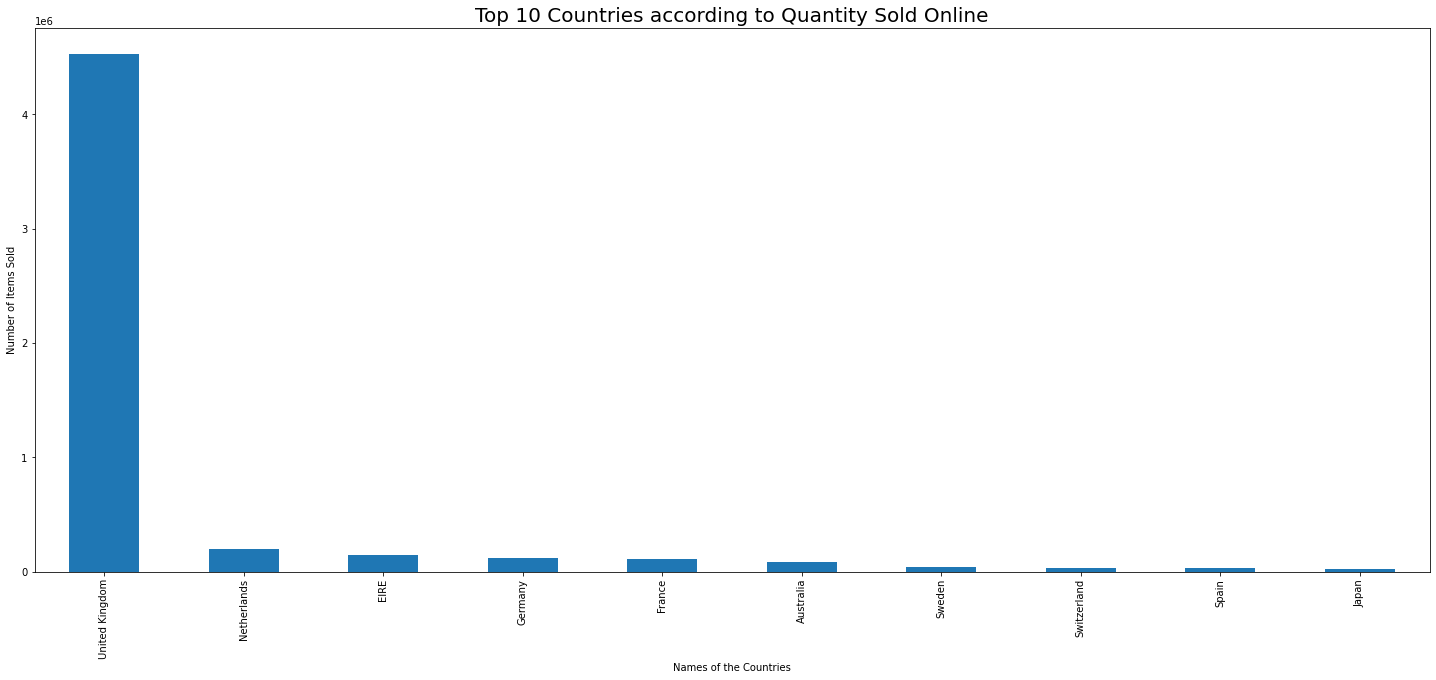

In [36]:
# Having a look at the top 10 Countries in terms of Quantities according to the countries

df_raw1['Quantity'].groupby(df_raw1['Country']).agg('sum').sort_values(ascending = False).head(10).plot.bar(figsize = (25, 10))

plt.title('Top 10 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()


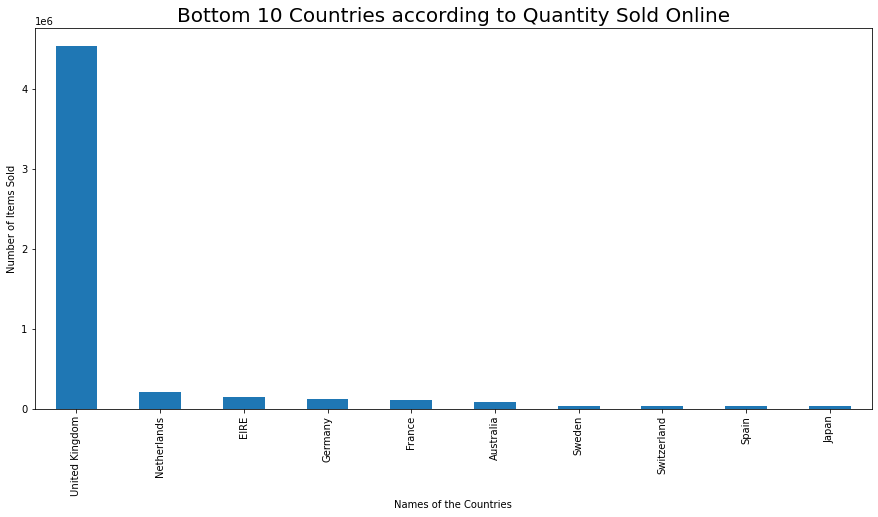

In [37]:
# Having a look at the bottom 10 Countries in terms of Quantities according to the countries

df_raw1['Quantity'].groupby(df_raw1['Country']).agg('sum').sort_values(ascending = False).head(10).plot.bar(figsize = (15, 7))

plt.title('Bottom 10 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

In [38]:
df_raw1['Amount'].groupby(df_raw1['Country']).agg('sum').sort_values(ascending = False)

Country
United Kingdom          8.979620e+06
Netherlands             2.854463e+05
EIRE                    2.831405e+05
Germany                 2.286784e+05
France                  2.096254e+05
Australia               1.384538e+05
Spain                   6.155856e+04
Switzerland             5.706760e+04
Belgium                 4.119634e+04
Sweden                  3.836783e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.368305e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.044054e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Hong Kong               1.548300e+04
Cyprus                  1.350285e+04
Austria                 1.019868e+04
Israel                  8.129410e+03
Poland                  7.334650e+03
Greece                  4.760520e+03
Unspecified             4.740940e+03
Iceland                 4.310000e+03
Canada                  3.6663

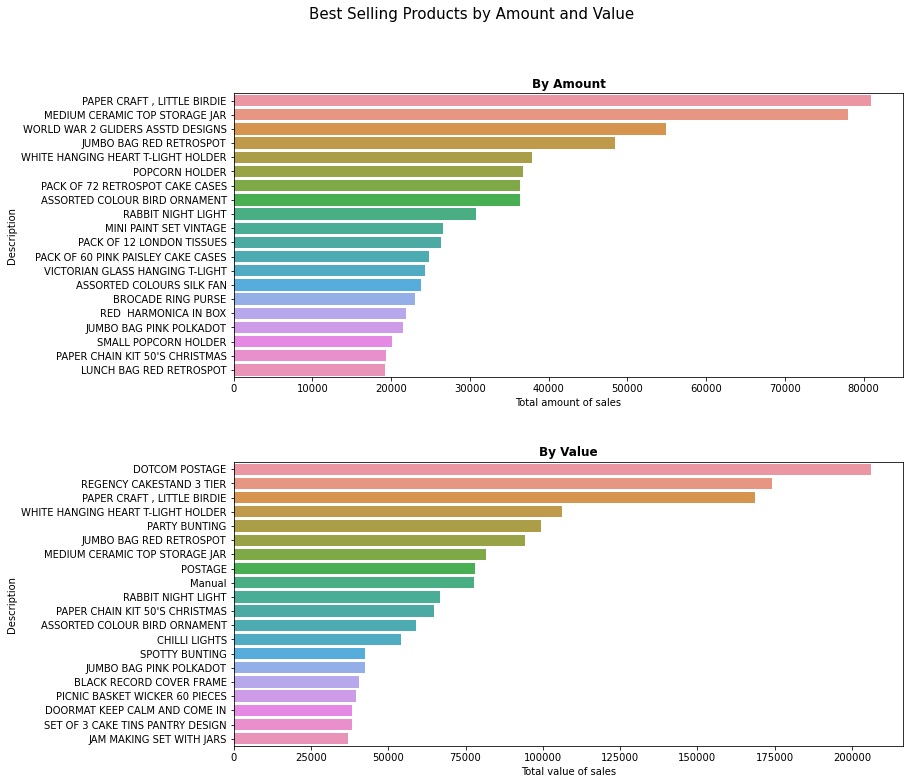

In [39]:
# Top 20 product by Amount and Value
Top20Quan = df_raw1.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False)[0:20]
Top20Price = df_raw1.groupby('Description')['Amount'].agg('sum').sort_values(ascending=False)[0:20]
#creating the subplot
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (12,12))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Best Selling Products by Amount and Value', fontsize=15, x = 0.4, y = 0.98)
sns.barplot(x=Top20Quan.values, y=Top20Quan.index, ax= axs[0]).set(xlabel='Total amount of sales')
axs[0].set_title('By Amount', size=12, fontweight = 'bold')
sns.barplot(x=Top20Price.values, y=Top20Price.index, ax= axs[1]).set(xlabel='Total value of sales')
axs[1].set_title('By Value', size=12, fontweight = 'bold')
plt.show()

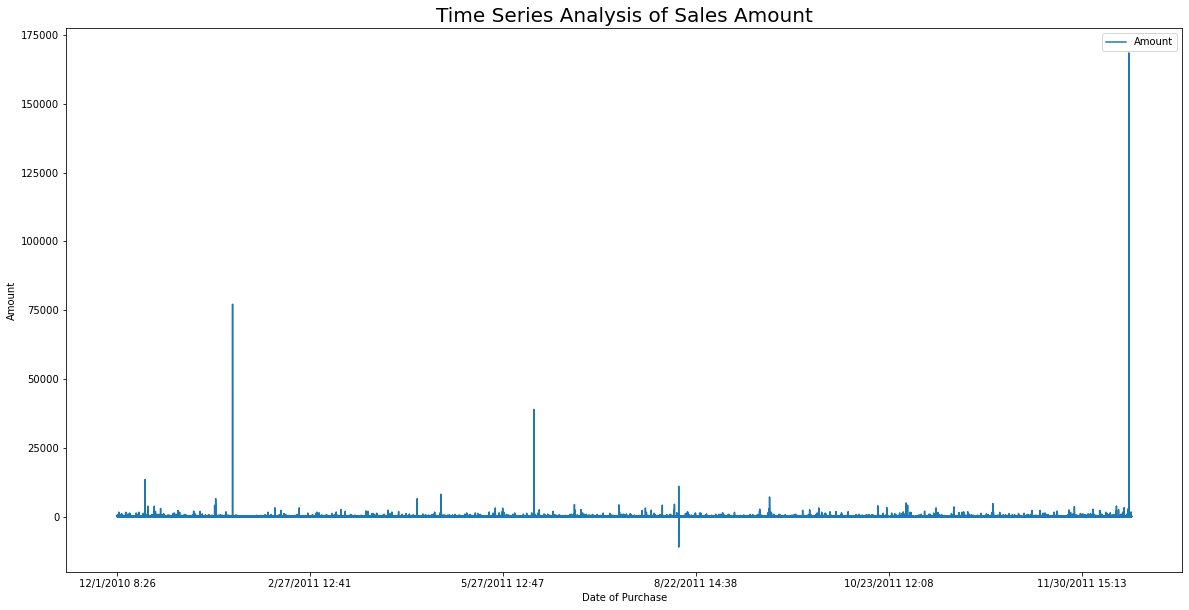

In [40]:
plt.rcParams['figure.figsize'] = (20, 10)
df_raw1.plot(x = 'InvoiceDate', y = 'Amount')
plt.title("Time Series Analysis of Sales Amount", fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Amount')
plt.show()

In [41]:
# seasonal growth in sells

In [42]:
df_raw1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [43]:
# changing other countries in to non-UK 
df_raw1['Country'] = df_raw1['Country'].map(lambda x: 'UK' if x=='United Kingdom' else 'non-UK')

In [44]:
df_raw1['Country'].unique()

array(['UK', 'non-UK'], dtype=object)

In [45]:
df_raw1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,UK,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,UK,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,UK,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,UK,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,UK,20.34


<AxesSubplot:xlabel='Country'>

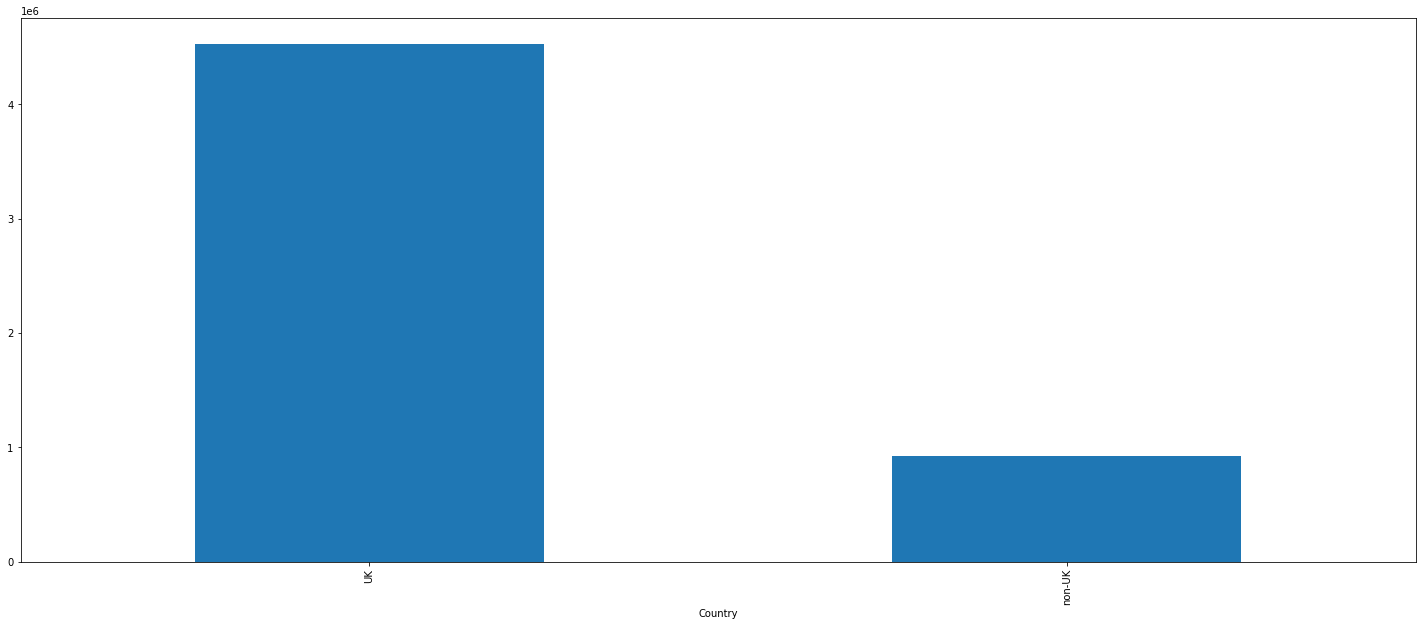

In [46]:
df_raw1['Quantity'].groupby(df_raw1['Country']).agg('sum').sort_values(ascending = False).head(10).plot.bar(figsize = (25, 10))

Text(0.5, 1.0, 'Time-Series plot for UK')

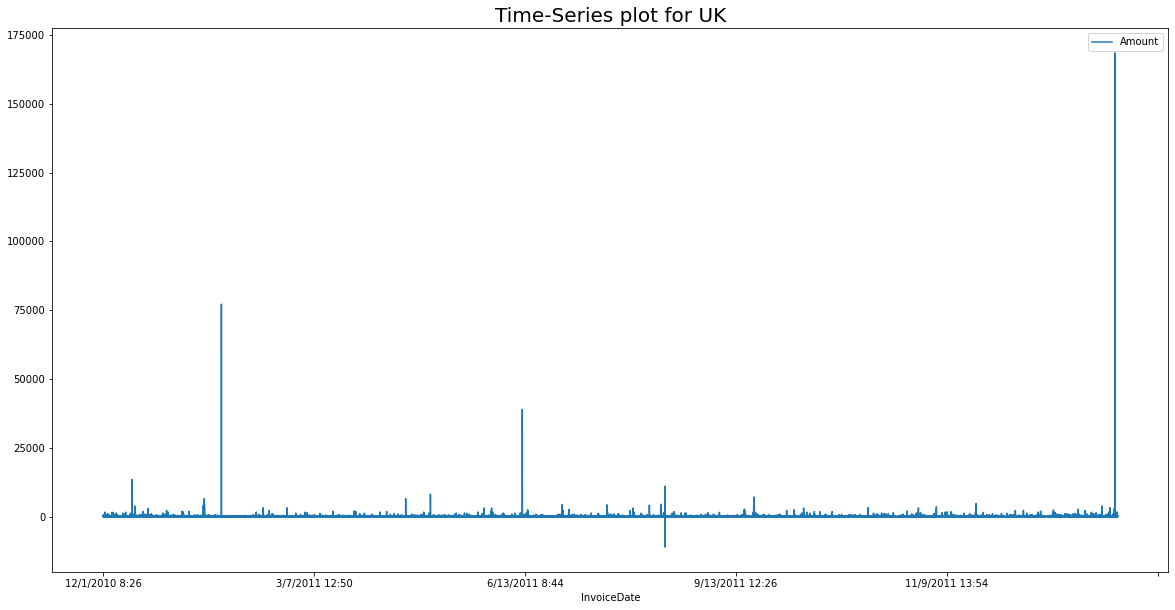

In [47]:
def time_series(country):
    dataset = df_raw1[df_raw1['Country'] == country]
    dataset.plot(x = 'InvoiceDate', y = 'Amount')
  
  
time_series('UK')
plt.title('Time-Series plot for UK', fontsize = 20)

Text(0.5, 1.0, 'Time-Series plot for non-UK Countries')

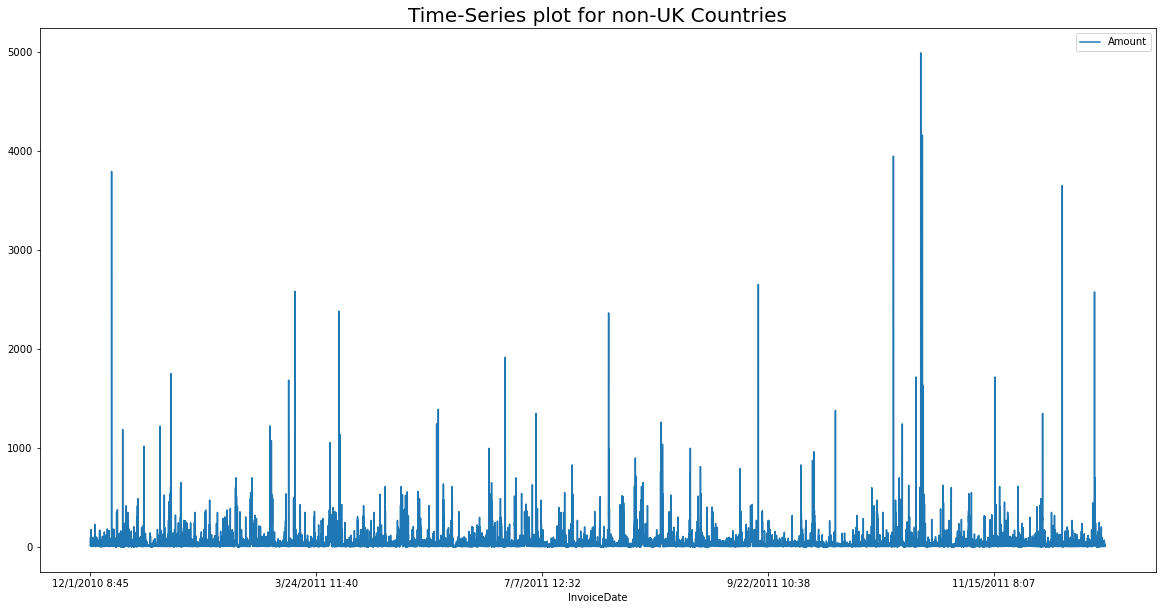

In [48]:
def time_series(country):
    dataset = df_raw1[df_raw1['Country'] == country]
    dataset.plot(x = 'InvoiceDate', y = 'Amount')
  
  
time_series('non-UK')
plt.title('Time-Series plot for non-UK Countries', fontsize = 20)

In [49]:
csgn = df_raw1.copy()

In [50]:
csgn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,UK,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,UK,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,UK,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,UK,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,UK,20.34


In [51]:
#Converting Invoice Date to Date Time Format
csgn['InvoiceDate']=pd.to_datetime(csgn['InvoiceDate'])

## Clustering for Customer segmentation

### RFM

### Customer segmentation by 3 important features:
- Recency — Number of days since the last purchase
- Frequency — Number of transactions made over a given period
- Monetary — Amount spent over a given period of time

### Monetary function

In [52]:
Monetary = csgn.groupby("CustomerID")['Amount'].sum()
Monetary = Monetary.reset_index()
Monetary.columns = ["CustomerID" , "Monetary"]
Monetary.head(5)

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### Frequency value

In [53]:
Columns = csgn[["CustomerID" , "InvoiceNo"]]

k = Columns.groupby("CustomerID").InvoiceNo.count()
Frequency = pd.DataFrame(k)
Frequency = k.reset_index()
Frequency.columns = ["CustomerID" , "Frequency"]
Frequency.head(5)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [54]:
#Merge Amount and Frequency Columns
amount_frequency = Monetary.merge(Frequency,on="CustomerID",how="inner")
amount_frequency.head(5)

,CustomerID,Monetary,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Recency value

In [55]:
Recency = csgn[['CustomerID' ,'InvoiceDate']]
maximum = max(Recency.InvoiceDate)

maximum = maximum + pd.DateOffset(days=1)
Recency['Difference'] = maximum - Recency.InvoiceDate
Recency.head(5)

,CustomerID,InvoiceDate,Difference
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [56]:
# Dataframe Merging by Recency
df_Recency = pd.DataFrame(Recency.groupby(['CustomerID','Difference']).min())
df_Recency = df_Recency.reset_index()
df_Recency = df_Recency.drop('InvoiceDate',axis=1)
df_Recency = df_Recency.rename(columns={"Difference" : "Recency"})
df_Recency.head(5)

,CustomerID,Recency
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12347.0,40 days 00:25:00
3,12347.0,130 days 04:02:00
4,12347.0,183 days 23:49:00


In [57]:
#Combining
RFM = df_Recency.merge(amount_frequency,on='CustomerID')

RFM = RFM.drop("CustomerID",axis=1)
RFM['Recency'] = RFM.Recency.dt.days

In [58]:
RFM.head()

,Recency,Monetary,Frequency
0,326,77183.6,1
1,2,4310.0,182
2,40,4310.0,182
3,130,4310.0,182
4,183,4310.0,182


In [59]:
RFM.shape

(18444, 3)

In [60]:
#Scaling Data for Clustering
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_Scaled = standard_scaler.fit_transform(RFM)

In [61]:
RFM_Scaled = pd.DataFrame(RFM_Scaled)
RFM_Scaled.columns = ["Frequency" , "Monetary" , "Recency"]
RFM_Scaled.head(5)

,Frequency,Monetary,Recency
0,1.458653,2.124858,-0.393769
1,-1.415066,-0.211840,-0.214893
2,-1.078025,-0.211840,-0.214893
3,-0.279769,-0.211840,-0.214893
4,0.190314,-0.211840,-0.214893


# Choosing the number of clusters

##  Elbow-curve
##  WCSS -> Within Clusters Sum of Squares

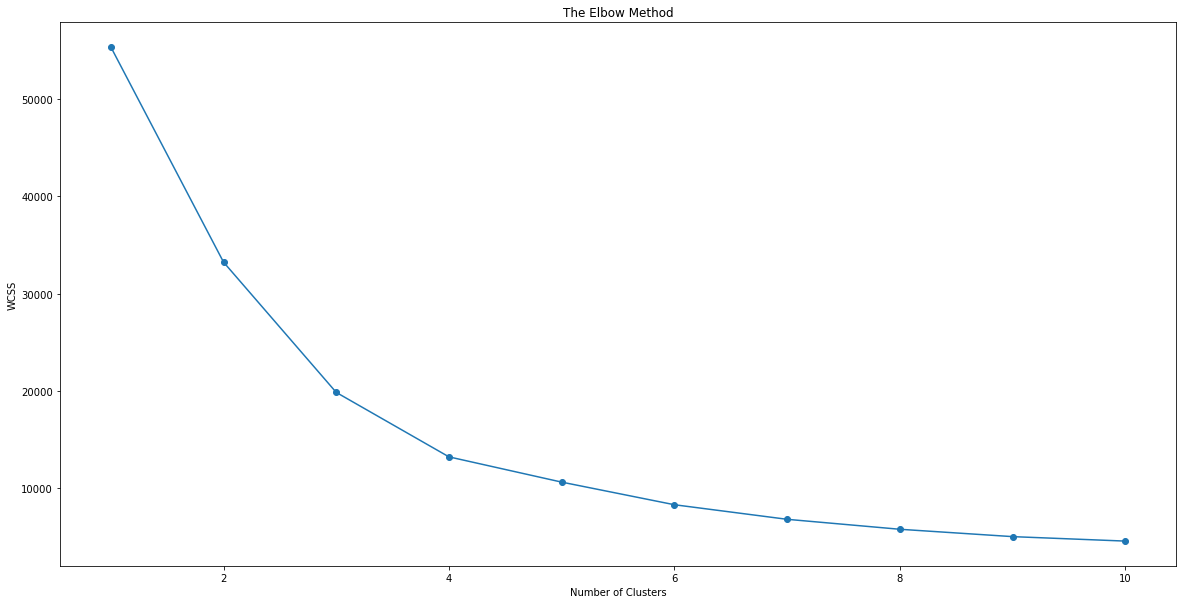

In [62]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(RFM_Scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### as above we can say optimal value of K is 4

## Silhouette analysis

In [63]:
for num_clusters in list(range(2,11)):
    # intialise kmeans
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(RFM_Scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(RFM_Scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.751827695095344
For n_clusters=3, the silhouette score is 0.534149404203003
For n_clusters=4, the silhouette score is 0.5426450015703492
For n_clusters=5, the silhouette score is 0.5610983019710827
For n_clusters=6, the silhouette score is 0.4935289444936344
For n_clusters=7, the silhouette score is 0.49584088405519006
For n_clusters=8, the silhouette score is 0.5050579426293625
For n_clusters=9, the silhouette score is 0.44209102125851385
For n_clusters=10, the silhouette score is 0.44614657355320564


### Elbow and Silhouette analysis
- From the elbow curve we observe the elbow at cluster 3 and cluster 4.
- Also from Silhouette analysis we see the value is better when number of cluster will be 4 rather than 3.
- So we now categorize the data into 4 clusters and check their RFM values and its distribution.

## Training the K-Means Clustering Model

In [64]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(RFM_Scaled)
print(cluster_labels)

[0 1 1 ... 1 1 0]


In [65]:
RFM_Scaled['clusters'] = clusterer.labels_
RFM_Scaled.head()

,Frequency,Monetary,Recency,clusters
0,1.458653,2.124858,-0.393769,0
1,-1.415066,-0.211840,-0.214893,1
2,-1.078025,-0.211840,-0.214893,1
3,-0.279769,-0.211840,-0.214893,1
4,0.190314,-0.211840,-0.214893,0


In [66]:
RFM_Scaled.groupby('clusters').mean().round(0)

,Frequency,Monetary,Recency
clusters,,,
0,1.0,-0.0,-0.0
1,-1.0,-0.0,-0.0
2,-0.0,2.0,5.0
3,-0.0,6.0,1.0


## Visualizing all the Clusters

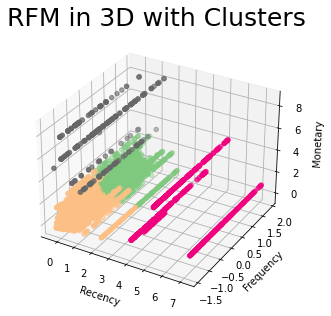

In [68]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(RFM_Scaled.Recency, RFM_Scaled.Frequency, RFM_Scaled.Monetary, c=RFM_Scaled.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=25)
ax.set(facecolor='white')
plt.show()

### Observations:
- In the above 3D graph, I put all the three variable into 3 axis and added the cluster variable to differentiate the points.
- Grey points in the group of customers whose Recency is low, Frequency is good and Monetary value is high.(that is good Customer segment)
- Green and Orange points in the group of customers whose Recency is low, Frequency is ok and Monetary value is also low.(most of the customers are in this cluster group)
- pink points in the group of customers whose Recency is high, Frequency is good and Monetary value is low.

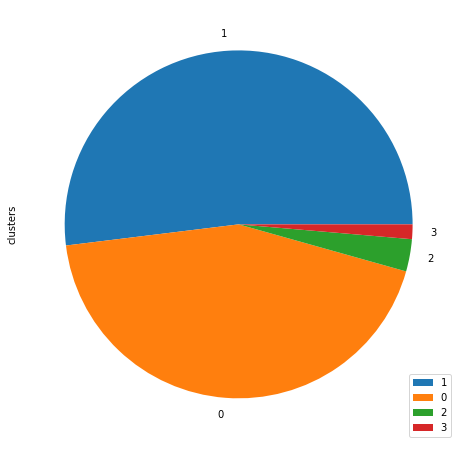

In [69]:
RFM_Scaled['clusters'].value_counts().plot.pie(figsize=(8,8))
plt.legend();

# Association Rule Mining
- Association Rule Mining In this section, we want to find the items that were often bought together by finding the association rules among them

# Apriori

In [70]:
df_raw.groupby(["InvoiceNo", "Description"])["Quantity"].sum()

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE     6
           RED WOOLLY HOTTIE WHITE HEART.          6
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
581587     PLASTERS IN TIN STRONGMAN              12
           SPACEBOY LUNCH BOX                     12
A563185    Adjust bad debt                         1
A563186    Adjust bad debt                         1
A563187    Adjust bad debt                         1
Name: Quantity, Length: 520326, dtype: int64

In [71]:
basket = df_raw.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().fillna(0)

In [72]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wet boxes,wet damaged,wet pallet,wet rusty,wet/rusty,wet?,wrong barcode,wrong barcode (22467),wrong code,wrong code?
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
basket["ZINC WIRE KITCHEN ORGANISER"].unique()

array([0., 2., 1., 3., 4.])

In [74]:
basket["10 COLOUR SPACEBOY PEN"].unique()

array([  0.,  24.,   1.,  96.,   2.,  12.,   7.,  48.,   3.,  15.,   4.,
        10.,   5.,  72.,   6.,  28., 144., 120., 288.,  36.])

### greater than 1 means they have purchase items so we info about it is purchaseed or not purchased so we can convert greater than 1 value in to into 1 that means purchased 0 means not purchased.

In [75]:
def abcd(x):
    if x>=1:
        return 1
    else:
        return 0

basket = basket.applymap(abcd) #dataframe

In [76]:
basket["10 COLOUR SPACEBOY PEN"].unique()

array([0, 1], dtype=int64)

In [77]:
basket

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wet boxes,wet damaged,wet pallet,wet rusty,wet/rusty,wet?,wrong barcode,wrong barcode (22467),wrong code,wrong code?
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### association rules

In [79]:
!pip install mlxtend 

In [80]:
from mlxtend.frequent_patterns import apriori, association_rules

In [81]:
freuency_items = apriori(basket, min_support=0.03, use_colnames=True)

In [82]:
rules=association_rules(freuency_items, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.051027,0.047580,0.031072,0.608944,12.798384,0.028645,2.435508
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047580,0.051027,0.031072,0.653061,12.798384,0.028645,2.735276
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037190,0.049279,0.030733,0.826371,16.769220,0.028900,5.475581
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.049279,0.037190,0.030733,0.623645,16.769220,0.028900,2.558252
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.049279,0.051755,0.037287,0.756650,14.619817,0.034737,3.896634
5,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.051755,0.049279,0.037287,0.720450,14.619817,0.034737,3.400901
6,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.059135,0.101568,0.040054,0.677340,6.668819,0.034048,2.784453
7,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.101568,0.059135,0.040054,0.394359,6.668819,0.034048,1.553504
8,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.101568,0.057047,0.033015,0.325048,5.697880,0.027220,1.397066
9,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.057047,0.101568,0.033015,0.578723,5.697880,0.027220,2.132641


## we can see the items that were most often bought together in the above table:
- antecedent=purchased,
- consequents= going purchase
- confidence= chances of buying toghether

## Conclusion
#####       Cluster (for customer segmentation and to find customer groups with similar behaviors for further analysis and business strategy planning)
           - For clustering we have used RFM Analysis and then by Elbow curve method we can see 4 is optimal value, for validation we used Silhouette analysis score which is confirming 4 cluster can be made
#####       Association Rules (to see which set of products were Frequently Bought Together)
           - We used apriori and then association rules for products which were Frequently Bought Together
        
## Scope for Improvements
           - By doing more Feature Engineering , we can do it without RFM too. 
           - With Gathering more data.
           - Different ways of clustering like DBScan algorithm etc.

### Thank You